In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import glob
import tqdm
from PIL import Image

import os
import cv2

from ultralytics import YOLO

In [2]:
# Load the model.
model = YOLO('runs/detect/cul_tld_512_yolov8s8/weights/best.pt')

In [3]:
images_paths = glob.glob("data\\culane\\*\\*.jpg")
labels_paths = glob.glob("data\\culane\\*\\*.txt")

In [4]:
images_paths[0], labels_paths[0]

('data\\culane\\06042010_0511.MP4\\00000.jpg',
 'data\\culane\\06042010_0511.MP4\\00000.lines.txt')

In [5]:
image = np.array(Image.open("image_3.webp"))

In [6]:
results = model(image, verbose=False)[0]

In [7]:
def draw_lines_on_frame(image, results):
    image = image.copy()
    lines = results.boxes.cls.cpu().numpy()
    coords = results.boxes.xywh.cpu().numpy()[:, :2].astype(int)
    
    for i in range(4):
        line_cutoff = lines[lines==i]
        if len(line_cutoff):
            line_coords = coords[lines==i]
            cv2.polylines(image, [np.array(sorted(line_coords, key=lambda x: x[1]))], isClosed=False, color=(255, 0, 0), thickness=2)
    return image

In [8]:
lines = results.boxes.cls.cpu().numpy()
coords = results.boxes.xywh.cpu().numpy()[:, :2].astype(int)

for i in range(4):
    line_cutoff = lines[lines==i]
    if len(line_cutoff):
        line_coords = coords[lines==i]
        cv2.polylines(image, [np.array(sorted(line_coords, key=lambda x: x[1]))], isClosed=False, color=(255, 0, 0), thickness=2) 

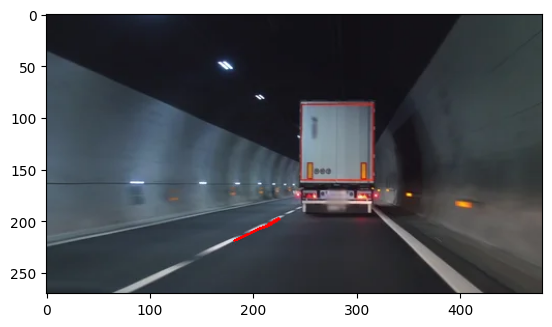

In [9]:
plt.imshow(image)

In [11]:
import cv2
import numpy as np
 
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('videos/video_1.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    results = model(frame, verbose=False)[0]
    frame = draw_lines_on_frame(frame, results)
    # Display the resulting frame
    cv2.imshow('Frame',frame)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [87]:
np.array(sorted(line_coords, key=lambda x: x[0]))

array([[182, 219],
       [197, 212],
       [204, 208],
       [213, 205],
       [225, 198]])

In [37]:
coords

array([[508, 359],
       [456, 393],
       [380, 438],
       [479, 377],
       [436, 406],
       [996, 549],
       [531, 344],
       [349, 458],
       [365, 447],
       [597, 304],
       [419, 413],
       [494, 369],
       [886, 469],
       [553, 331]])

In [15]:
coords = results.boxes.xywh.cpu().numpy()[:, :2].astype(int)
# coords[:, 0], coords[:, 1] = coords[:, 1].copy(), coords[:, 0].copy()

In [16]:
coords

array([[508, 359],
       [456, 393],
       [380, 438],
       [479, 377],
       [436, 406],
       [996, 549],
       [531, 344],
       [349, 458],
       [365, 447],
       [597, 304],
       [419, 413],
       [494, 369],
       [886, 469],
       [553, 331]])

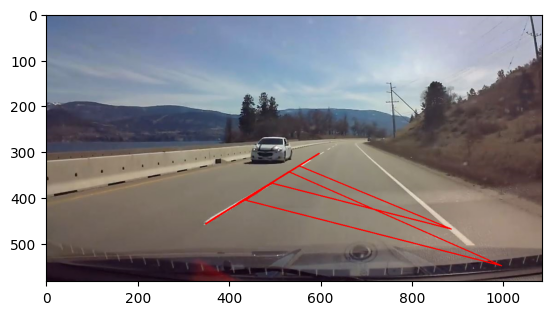

In [20]:
cv2.polylines(image, [coords], isClosed=False, color=(255, 0, 0), thickness=2) 
plt.imshow(image)

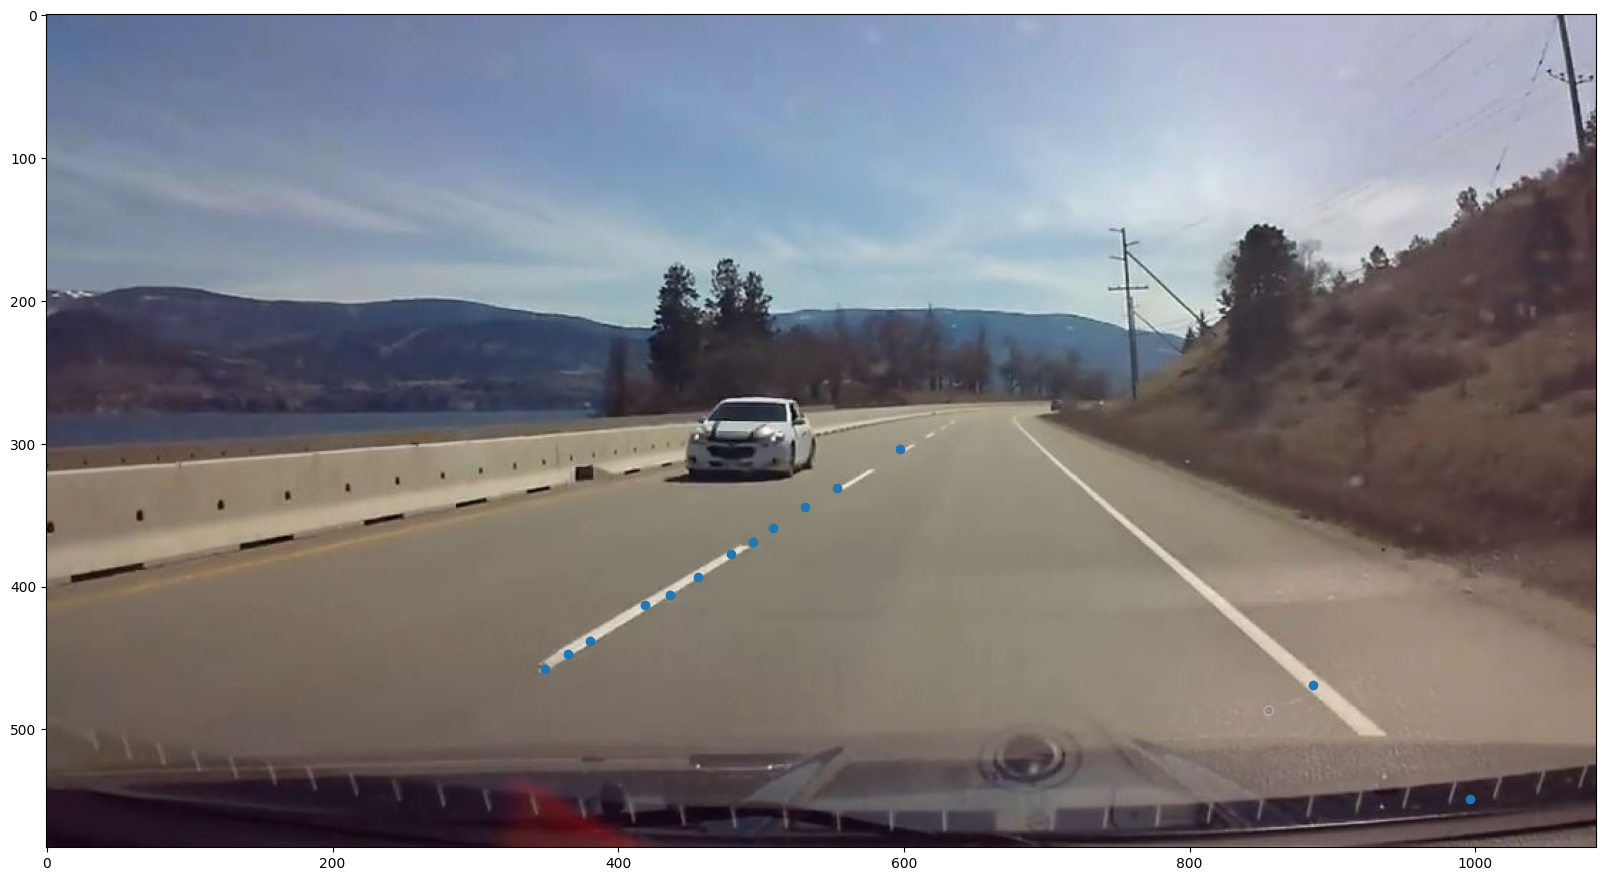

In [199]:
results = model(image, verbose=False)[0]
coords = results.boxes.xywh.cpu().numpy()[:, :2].astype(int)
coords[:, 0], coords[:, 1] = coords[:, 1].copy(), coords[:, 0].copy()

plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.scatter(coords[:, 1], coords[:, 0])

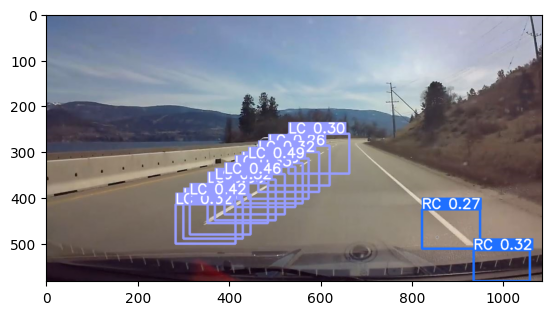

In [200]:
plt.imshow(results.plot())